## Here is the summary of what are tried, what worked for me and what not
- My baseline score is `86.23`. I believed it was due to `over-fitting`. And as the features are unknown, so it was difficult to make an interpretation for `feature engineering`. So i followed several approach to do that

1. Handle NULL value, with two ways
    - use tree-based method
    - created an indicator variable to represent `NULL` and fill it with some number in original feature
    - used MICE(didn't help)
2. Target encoding(didn't helped)(due to target leakage, tried to handle it carefully, but failed)
3. Removed highly correlated feature
4. Used `p-test` to remove irrelavant feature(It again can create some problem, as OLS is linear model)
    - I carefully selected `p-value`, one for linear model
    - other for further feature processing
5. SVD/PCA/NMF feature on original and selected dataset.
    - use NMF, we get 2 advantage
        1. it create new feature(as we need absolute value)
        2. feature space tramnformation
6. feature interaction, (i created a list of `20000` complex feature)
    - Select a subset of 300-400 feature, prepare dataset
    - build model to evaluate those feature
        1. If score < baseline: remove them
        2. Else: calculate `oof` prediction
7. created an ensemble
    - catboost/xgboost/logistic-regression/passive-aggressive/ridge

## I faced problem in final submission, so i just su

## Highly suspicious feature
- These columns have very weird distribution and are highly cardinal
- Another also have high correlation
- `['Col190','Col191','Col192','Col204','Col230','Col242','Col252','Col253',
 'Col912','Col347','Col384','Col387','Col388','Col389','Col401','Col427',
 'Col439','Col449','Col450','Col544','Col579','Col580','Col581','Col582',
 'Col583','Col584','Col585','Col586','Col587','Col597','Col603','Col623',
 'Col635','Col702','Col711','Col724','Col742','Col791','Col799','Col800',
 'Col813','Col831']`

## I don't understand what my model is learning, following columns are garbage(1 cat is majority 99.9%, rest are single tuple)

    - If we remove these columns `f1-score` for minority class decrease, but weighted average remain same

In [9]:
del_cols = ['Col635','Col427','Col242','Col230','Col439','Col623','Col597','Col401','Col204','Col702','Col791','Col724','Col813']
train.drop(del_cols, axis=1, inplace=True)
test.drop(del_cols, axis=1, inplace=True)


## I tried to bins/groups sone rare occuring label/category for few columns, which have bincount as described below, but that doesn't helped much

In [ ]:
# 0.000000    13890
# 1.000000     1302
# 0.666667      544
# 0.333333      481
# 1.333333       85
# 2.000000       53
# 1.666667       38
# 3.000000       11
# 2.333333        9
# 3.333333        7
# 4.666667        2
# 2.666667        2
# 5.000000        1
# 6.333333        1
# 4.000000        1

## My observation on `Logistic-Regression` with `balanced` classes-weights
- choose alpha = [0.1, 1] for better `f1-score` for minority class
- logistic-regression works good on interaction based feature

## observation about `PassiveAggressiveClassifier`
1. with `squared_hinge`:
    - with `balanced` class-weight `alpha` of [0.0001,  0.001,  0.01], 2nd is best, it will help in ensembling as recall is high of one class as compared to others
    - without `balanced`, use `alpha` = [0.001]
2. with `hinge`:
    - with `balanced`, alpha = [1, 9, 10]
    - without `balanced`, use alpha = [0.001]


## Weirdness in data(in approximately 1200 rows)
- these rows were effecting model boundary, so i dropped these columns

# By removing these weird observation, we get following count-plot

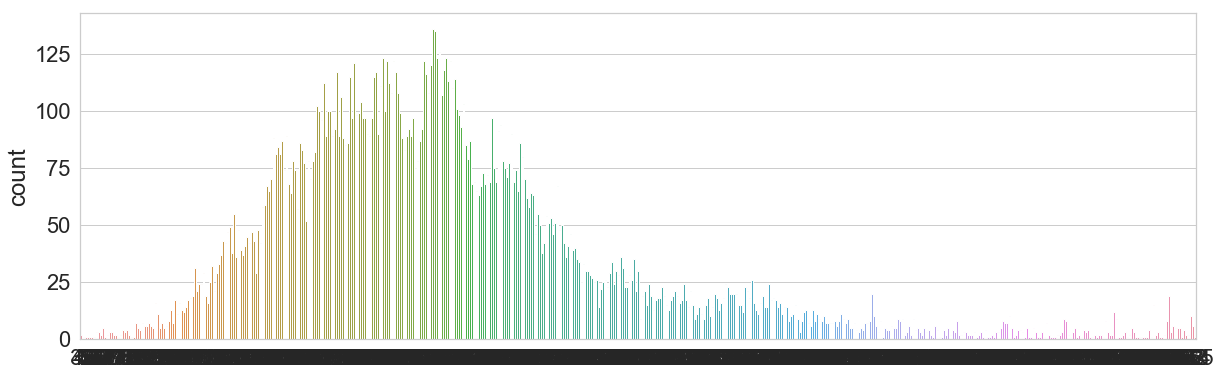

In [62]:
plt.figure(figsize=(20,6))
sns.countplot(nulls1, orient='h')

In [56]:
train1.drop_duplicates().shape, train.shape

((16405, 3171), (17521, 2391))

# Countplot with weird observation

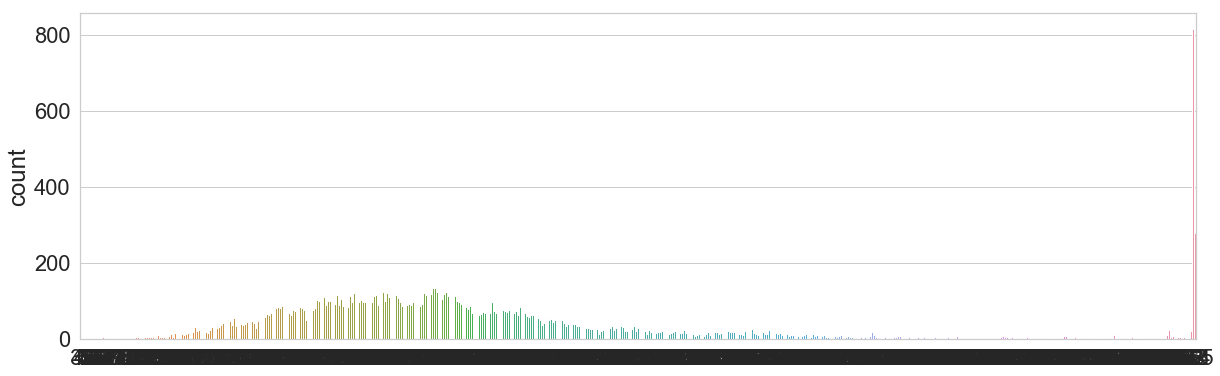

In [51]:
plt.figure(figsize=(20,6))
sns.countplot(train.isnull().sum(1), orient='h')

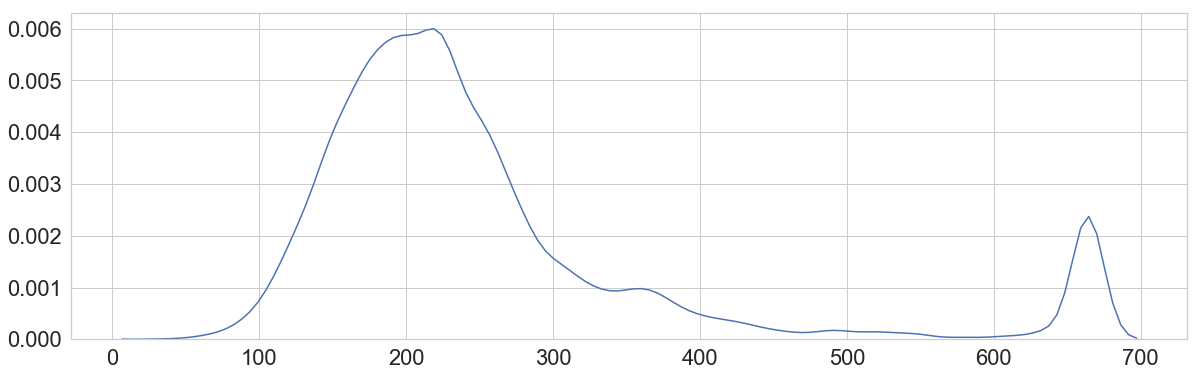

In [52]:
plt.figure(figsize=(20,6))
sns.kdeplot(train.isnull().sum(1))

# distribution visualization of good columns, which influence the decision
- My observation:
    - Most of them have good(normal/skewed) distribution
    - With log transformation, these are very good for linear/non-linear model
    - If we compared these with feature of less importance, these have good statistical properties

Printing from 0 to 10


<Figure size 432x288 with 0 Axes>

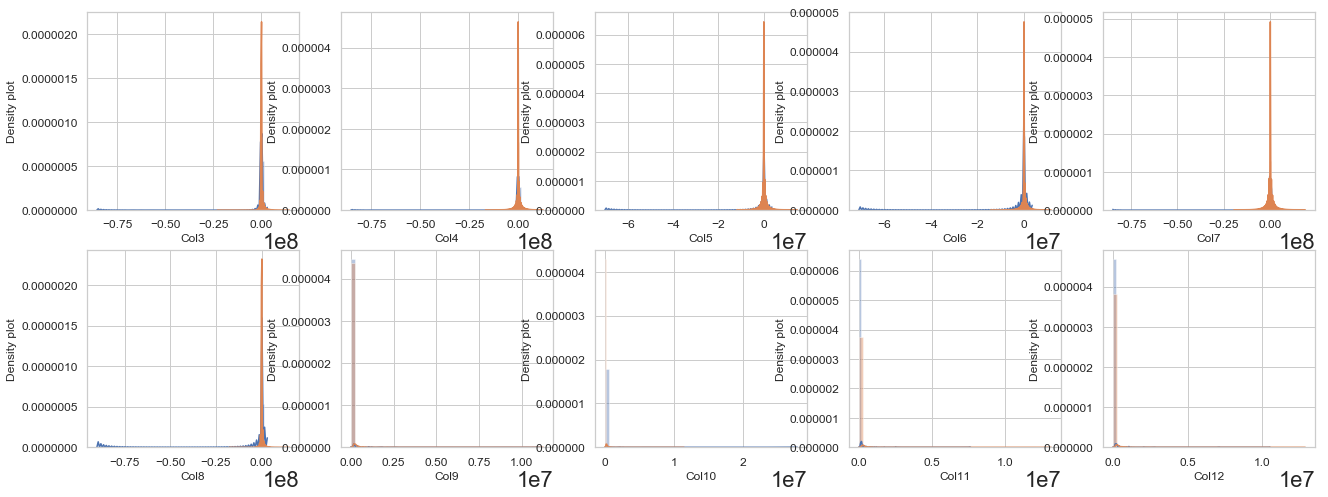

Printing from 10 to 20


<Figure size 432x288 with 0 Axes>

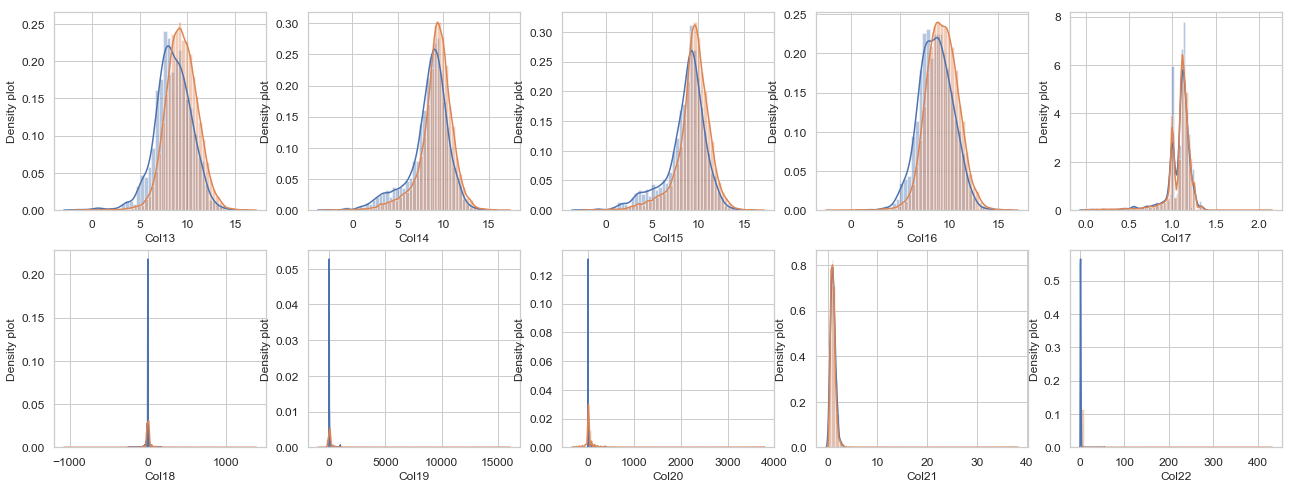

Printing from 20 to 30


<Figure size 432x288 with 0 Axes>

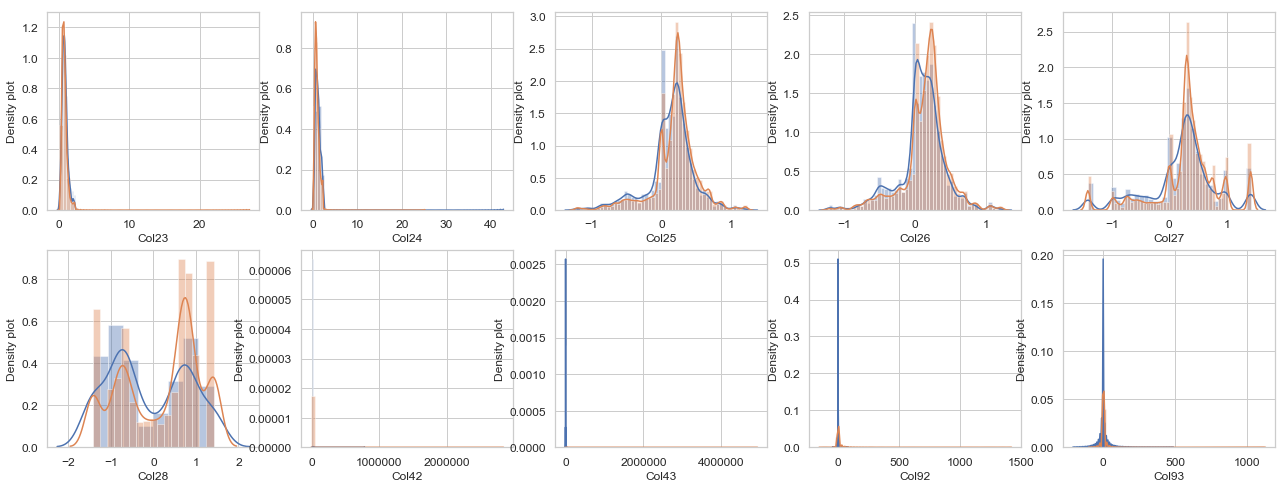

Printing from 30 to 40


<Figure size 432x288 with 0 Axes>

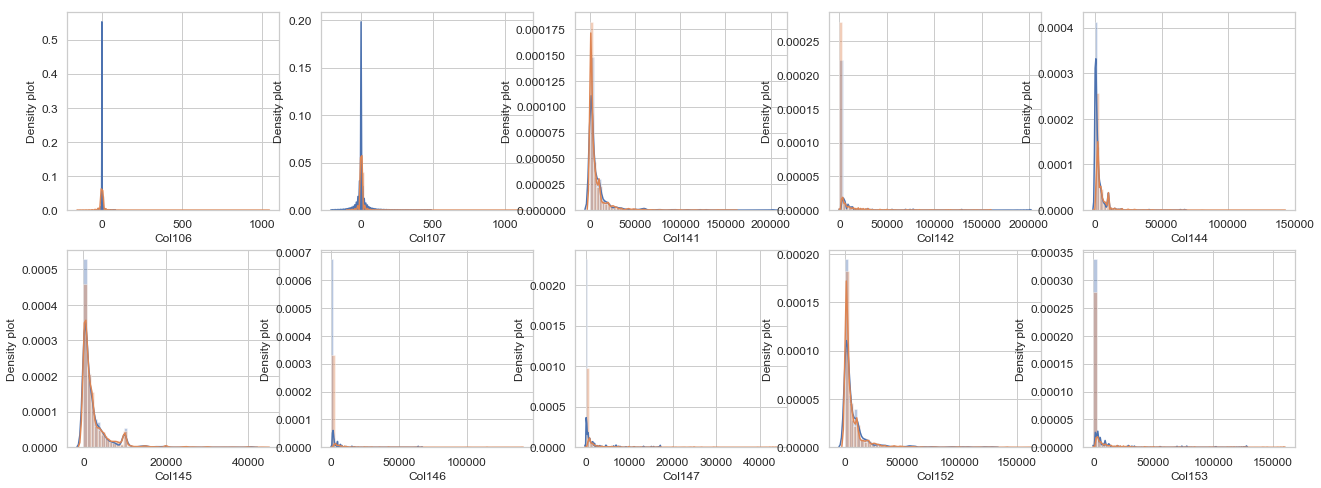

Printing from 40 to 50


<Figure size 432x288 with 0 Axes>

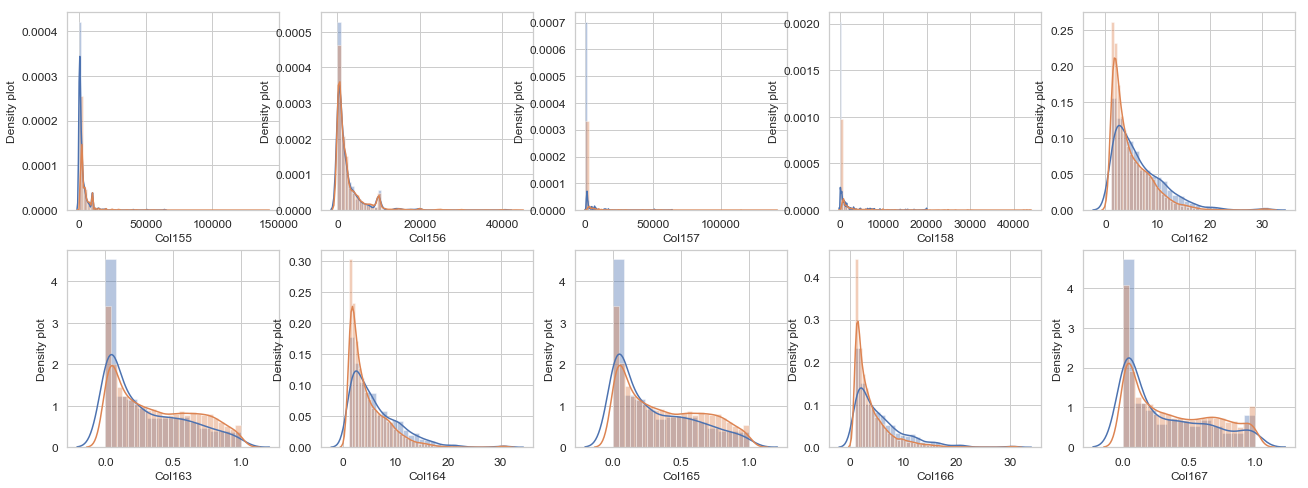

Printing from 50 to 60


<Figure size 432x288 with 0 Axes>

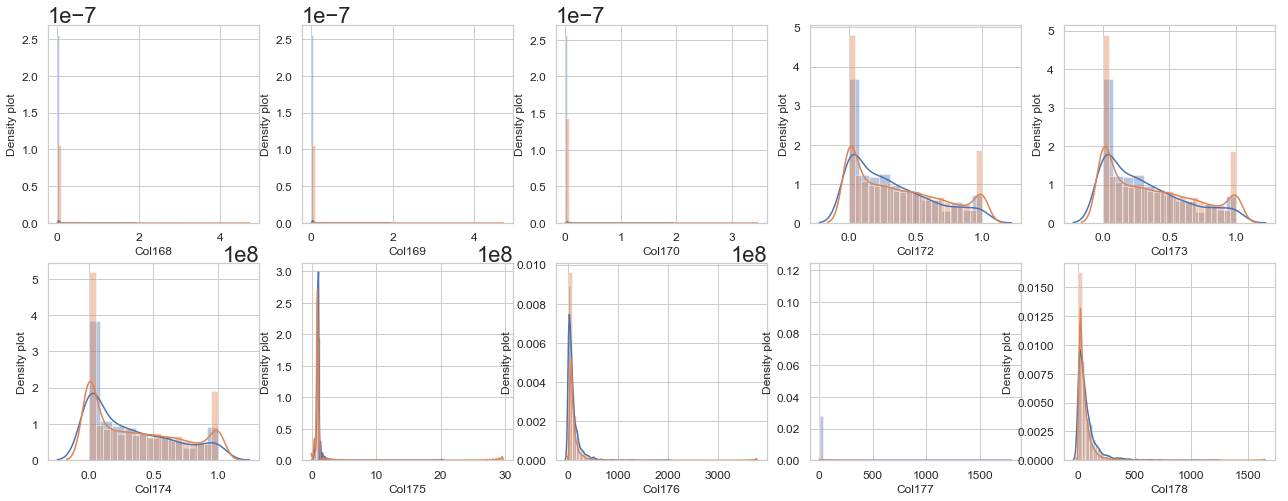

Printing from 60 to 70


<Figure size 432x288 with 0 Axes>

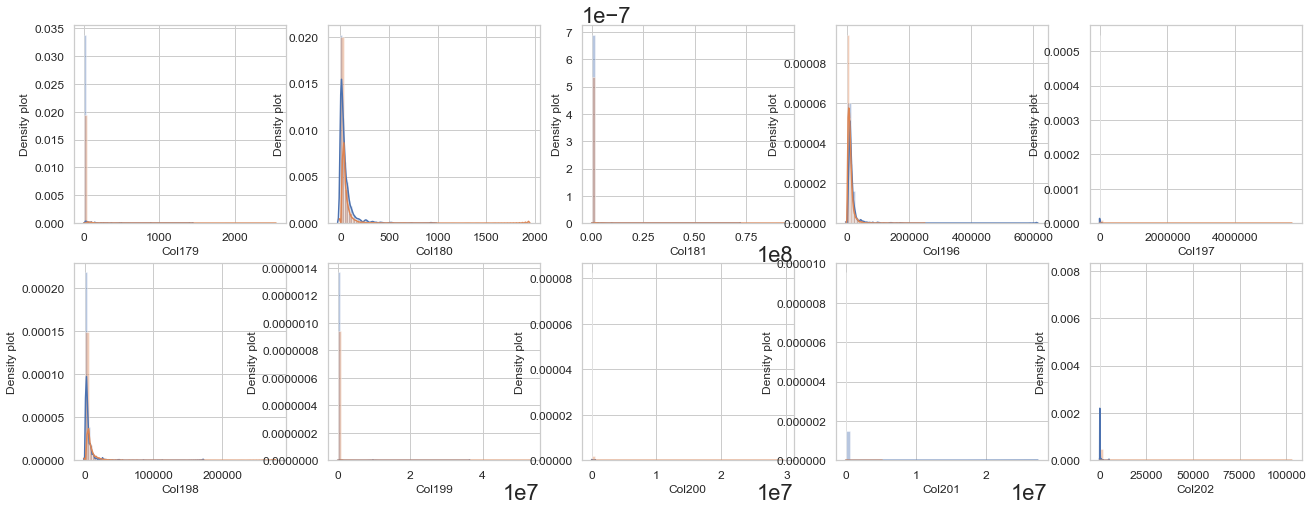

Printing from 70 to 80


<Figure size 432x288 with 0 Axes>

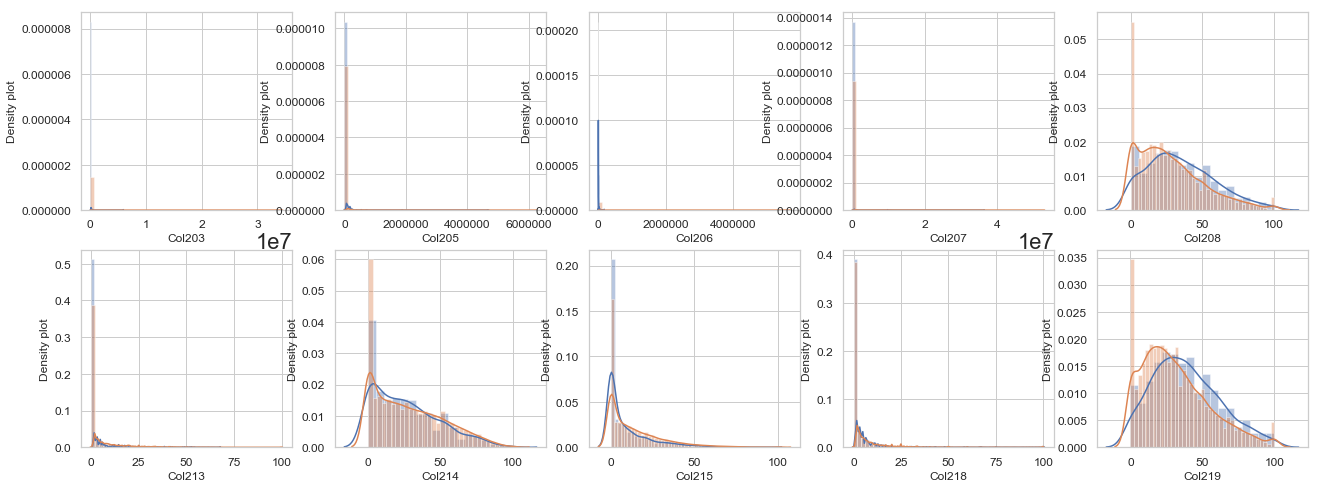

Printing from 80 to 90


<Figure size 432x288 with 0 Axes>

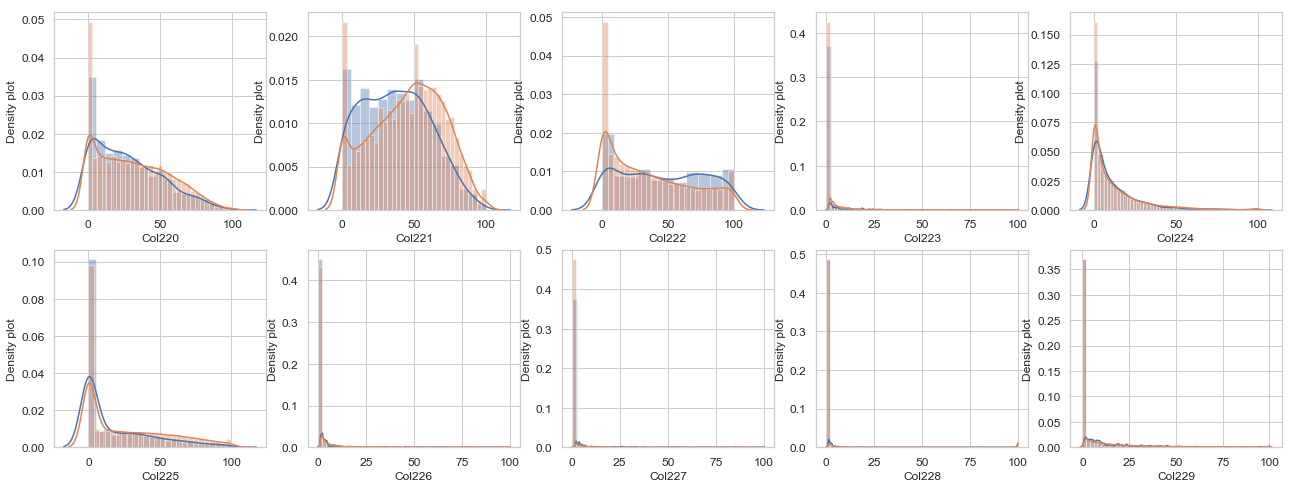

Printing from 90 to 100


<Figure size 432x288 with 0 Axes>

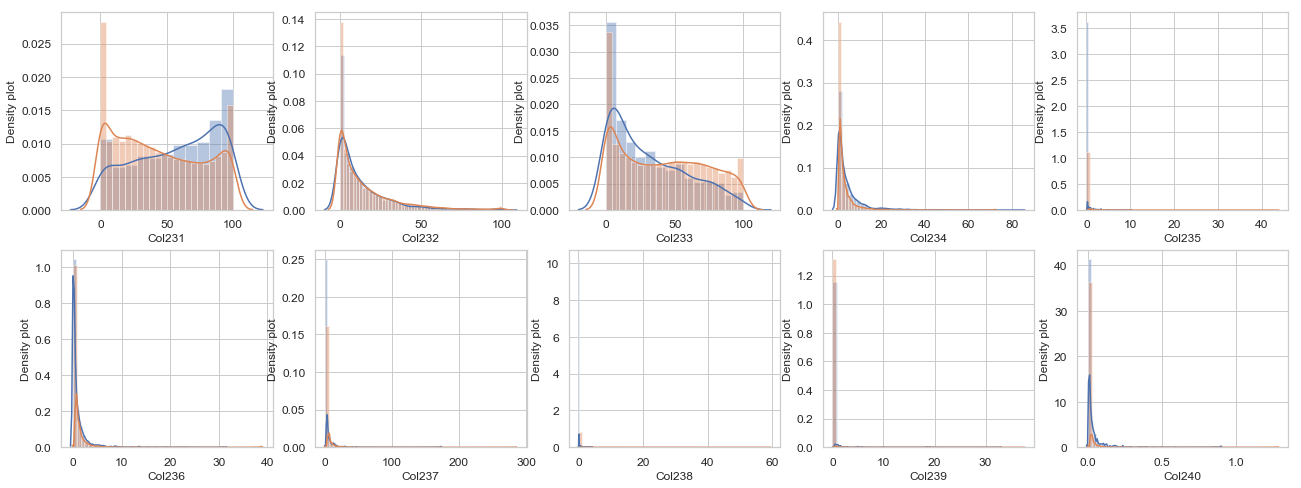

In [35]:
for i in range(10):
    print("Printing from {} to {}".format(i*10, (i+1)*10))
    plot_distribution(good_cols[i*10:(i+1)*10])

Printing from 0 to 10


<Figure size 432x288 with 0 Axes>

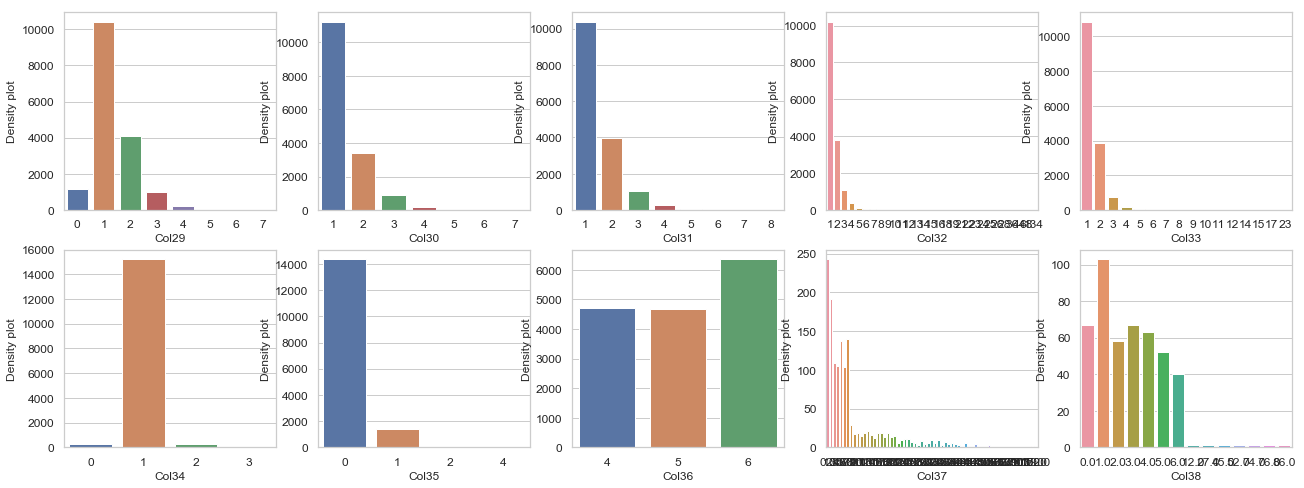

Printing from 10 to 20


<Figure size 432x288 with 0 Axes>

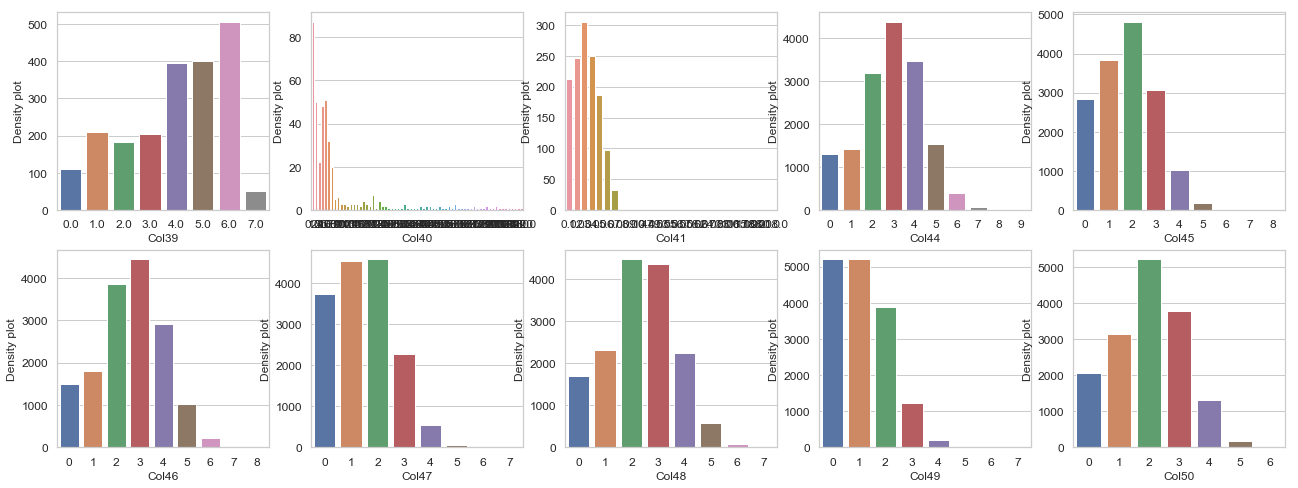

Printing from 20 to 30


<Figure size 432x288 with 0 Axes>

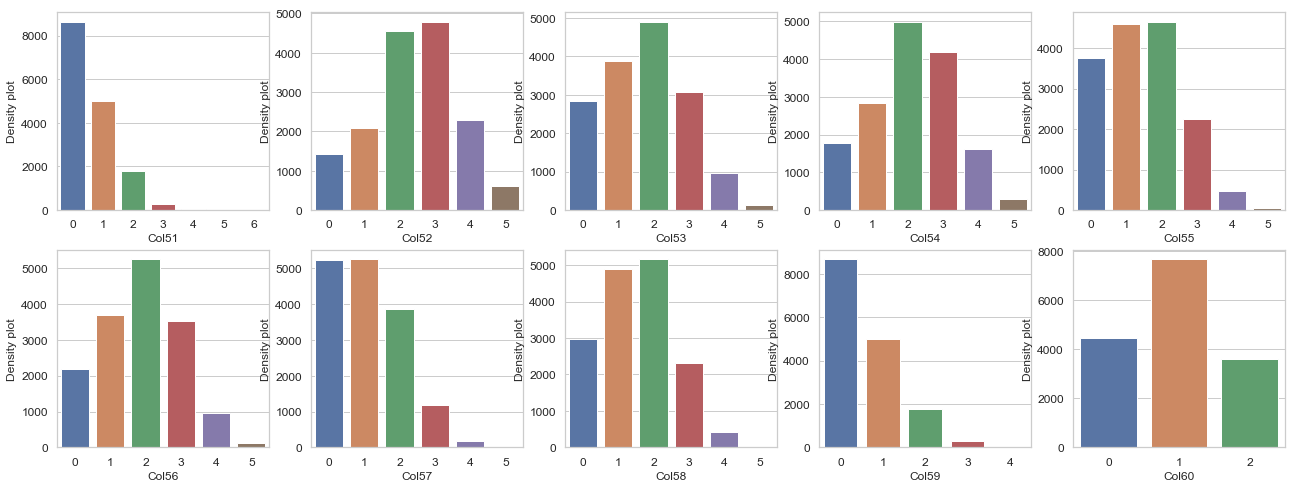

Printing from 30 to 40


<Figure size 432x288 with 0 Axes>

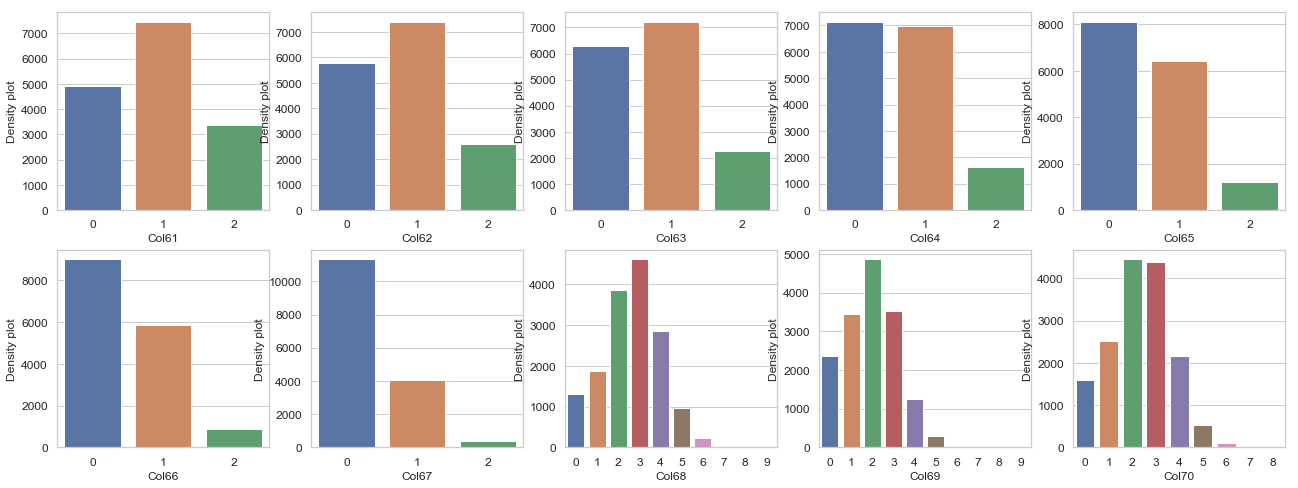

Printing from 40 to 50


<Figure size 432x288 with 0 Axes>

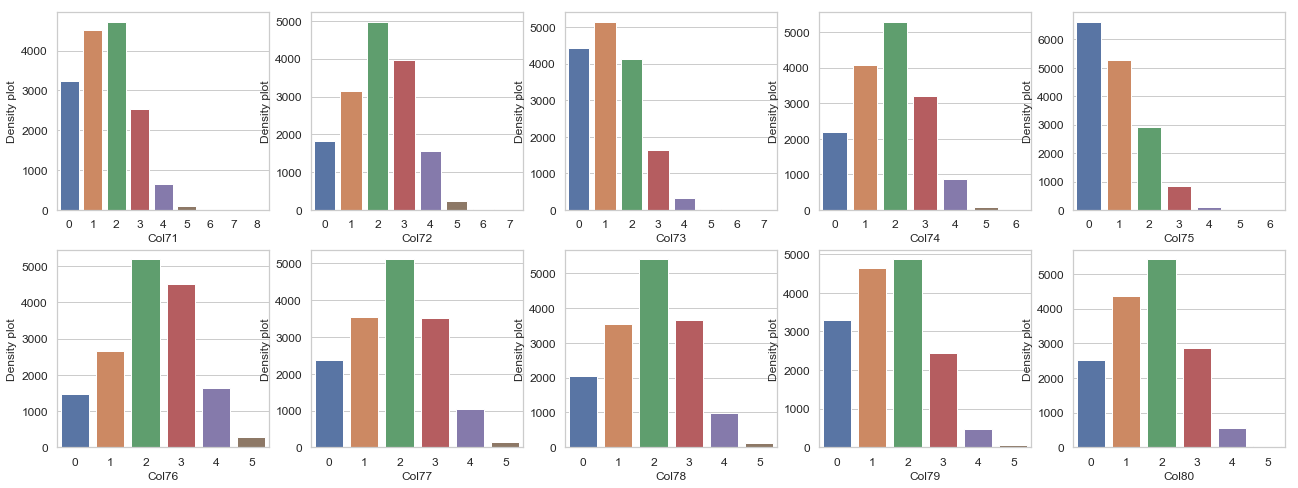

Printing from 50 to 60


<Figure size 432x288 with 0 Axes>

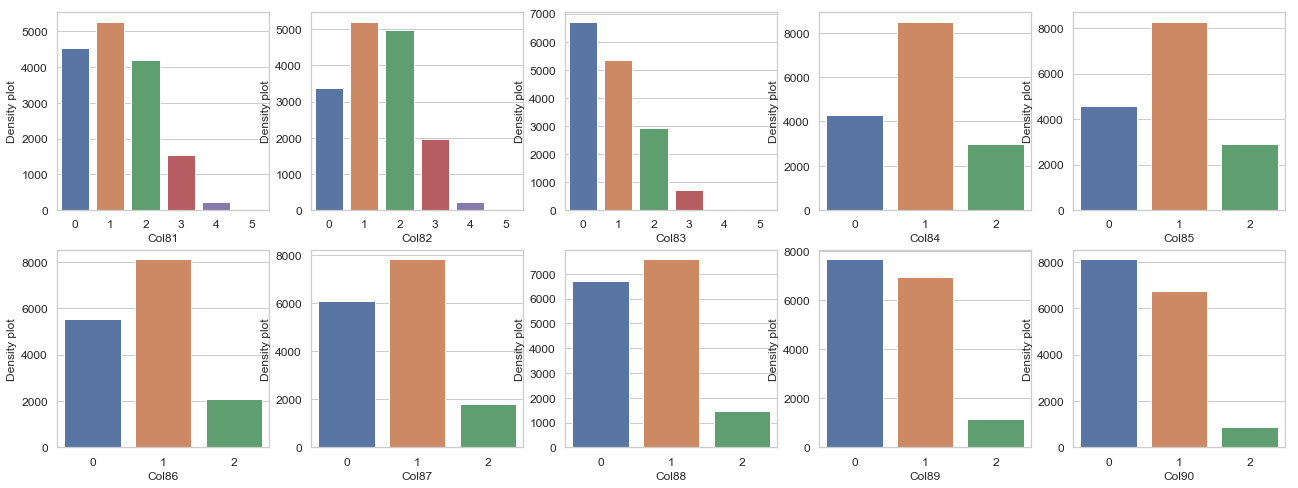

Printing from 60 to 70


<Figure size 432x288 with 0 Axes>

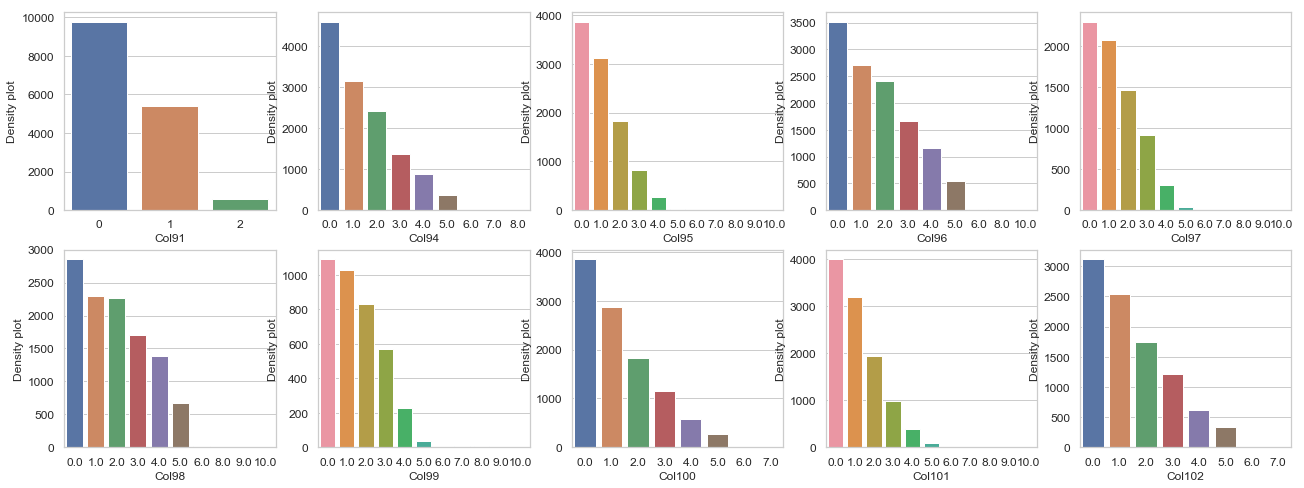

Printing from 70 to 80


<Figure size 432x288 with 0 Axes>

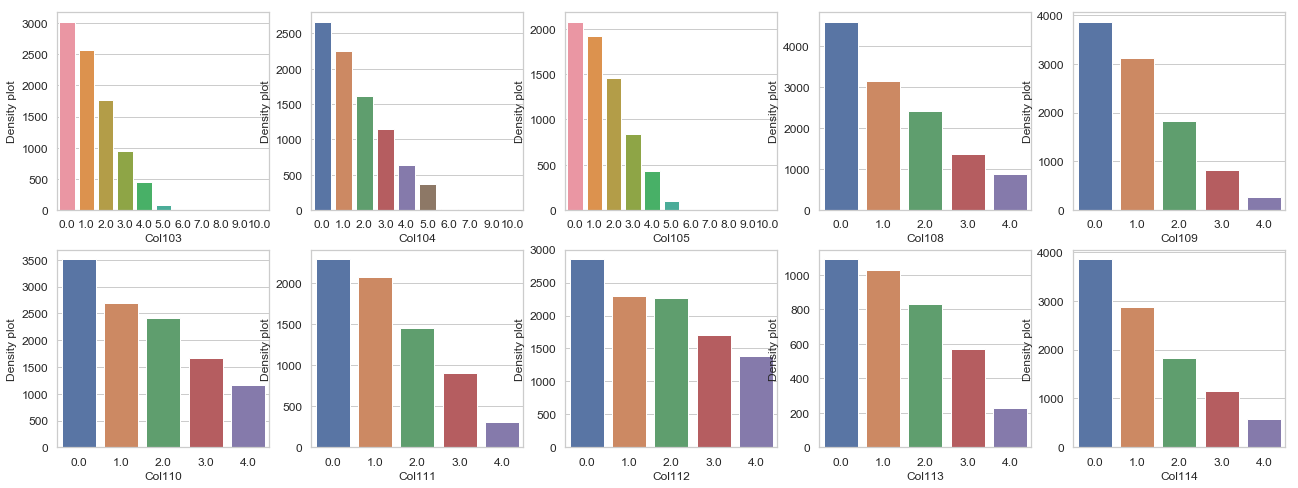

Printing from 80 to 90


<Figure size 432x288 with 0 Axes>

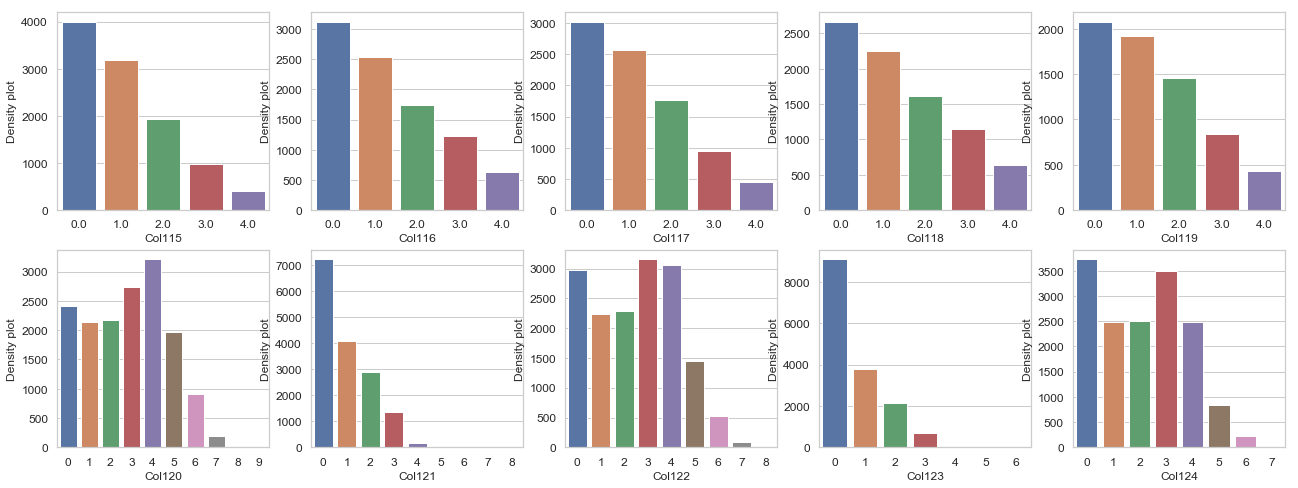

Printing from 90 to 100


<Figure size 432x288 with 0 Axes>

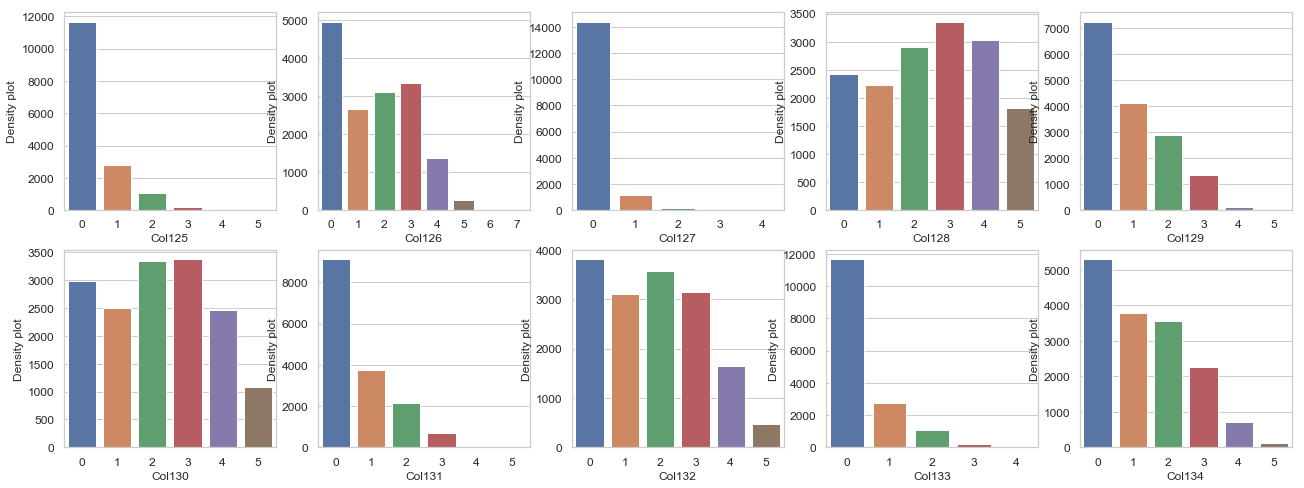

In [62]:
  
for i in range(10):
    print("Printing from {} to {}".format(i*10, (i+1)*10))
    plot_distribution(cat_cols[i*10:(i+1)*10])

## Some of those have null importance to tree-based and deep learning models
- My observation:
    - these feature looks funnier
    - their high cardinality has reduce the importance.
    - a few of them such as `[col143, col148, col186-195,...]` has majority class amount as `>95%`.
    - **one intersting point** that a few of them have only values/label for class `1` and null for class `0`. I removed them

Printing from 100 to 110


<Figure size 432x288 with 0 Axes>

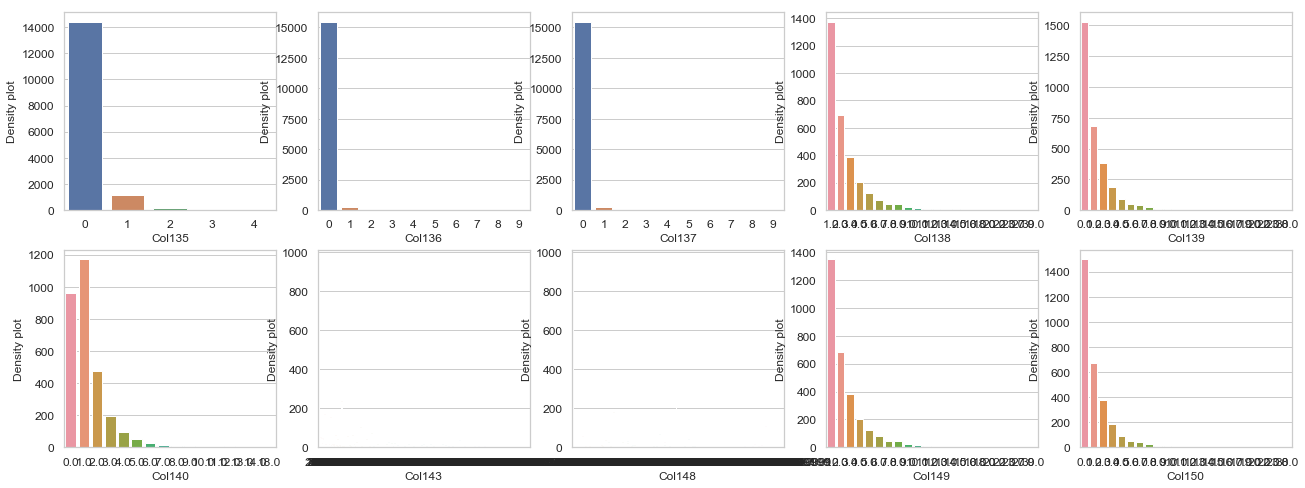

Printing from 110 to 120


<Figure size 432x288 with 0 Axes>

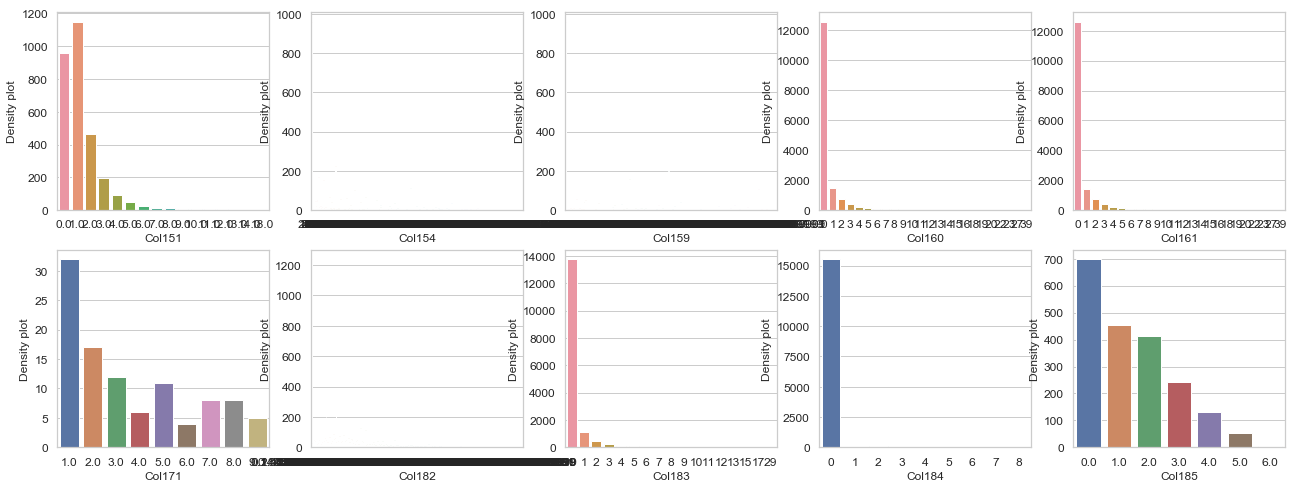

Printing from 120 to 130


<Figure size 432x288 with 0 Axes>

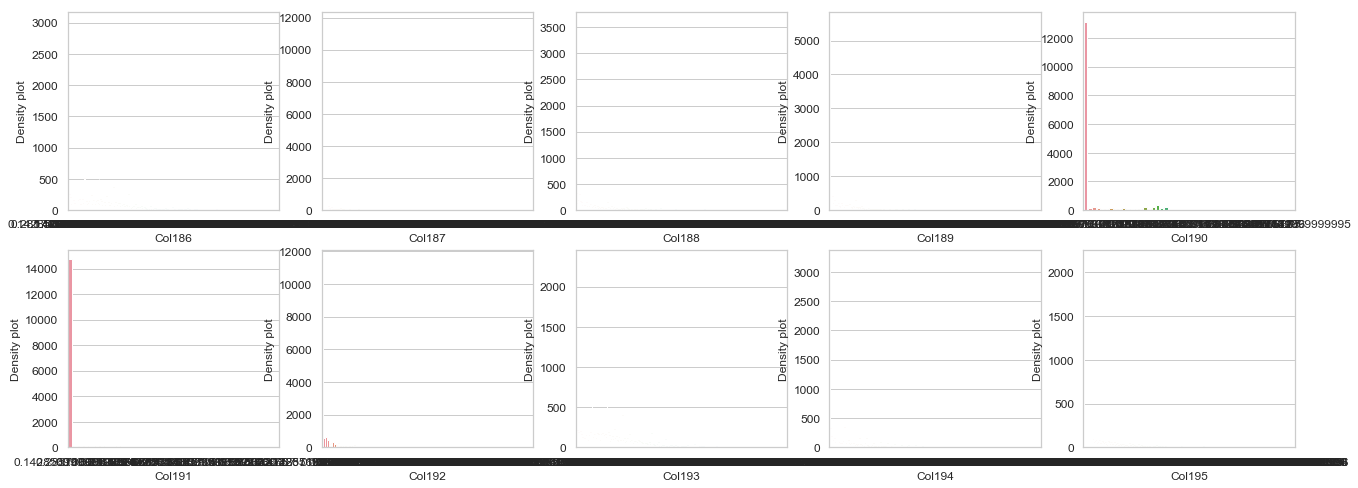

Printing from 130 to 140


<Figure size 432x288 with 0 Axes>

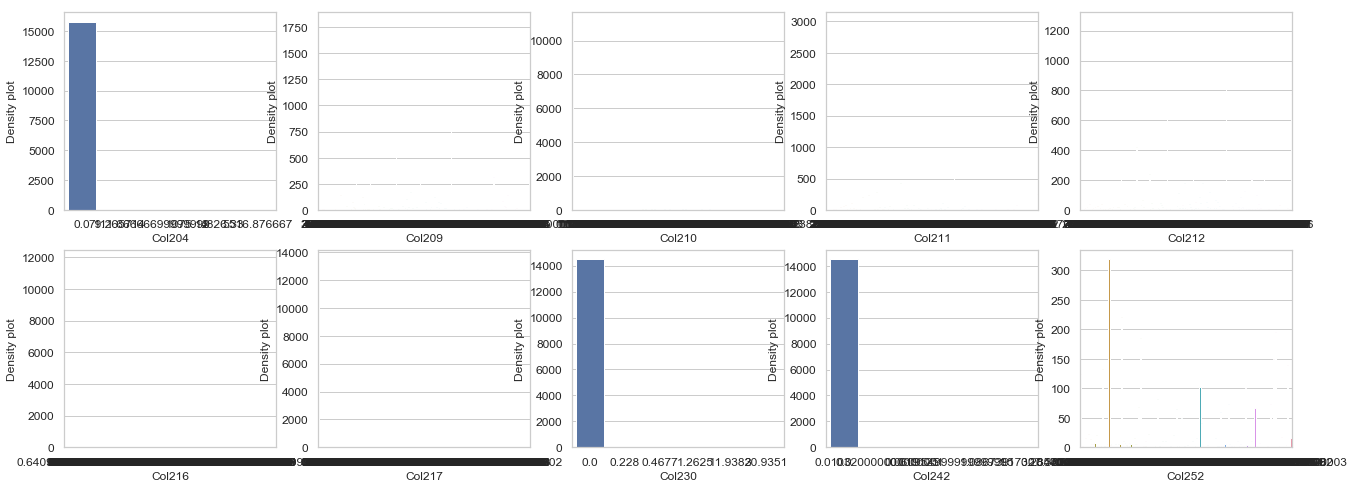

Printing from 140 to 150


<Figure size 432x288 with 0 Axes>

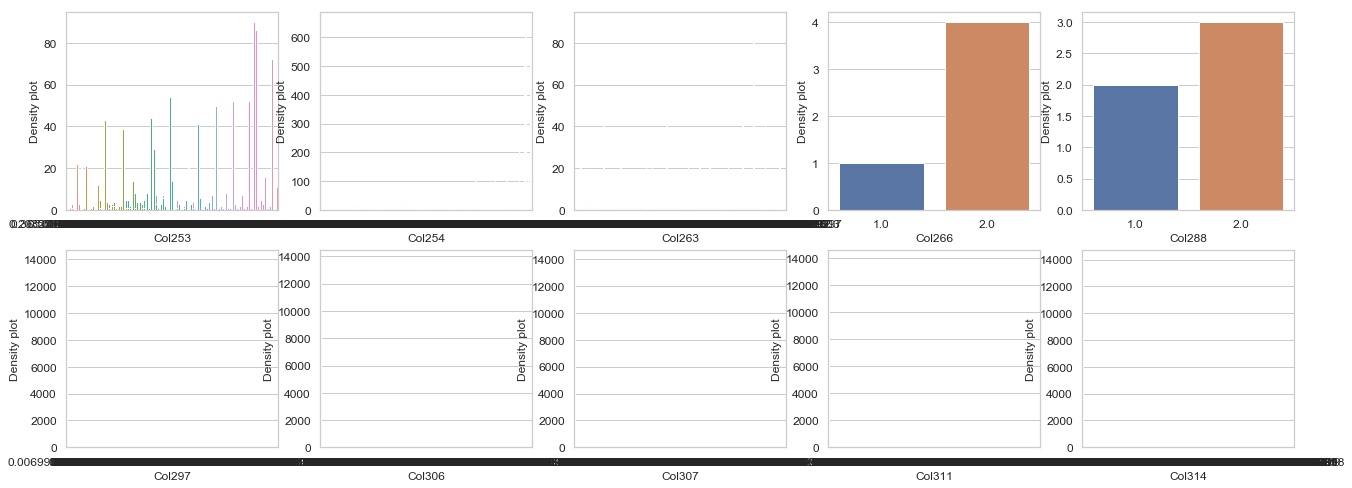

Printing from 150 to 160


<Figure size 432x288 with 0 Axes>

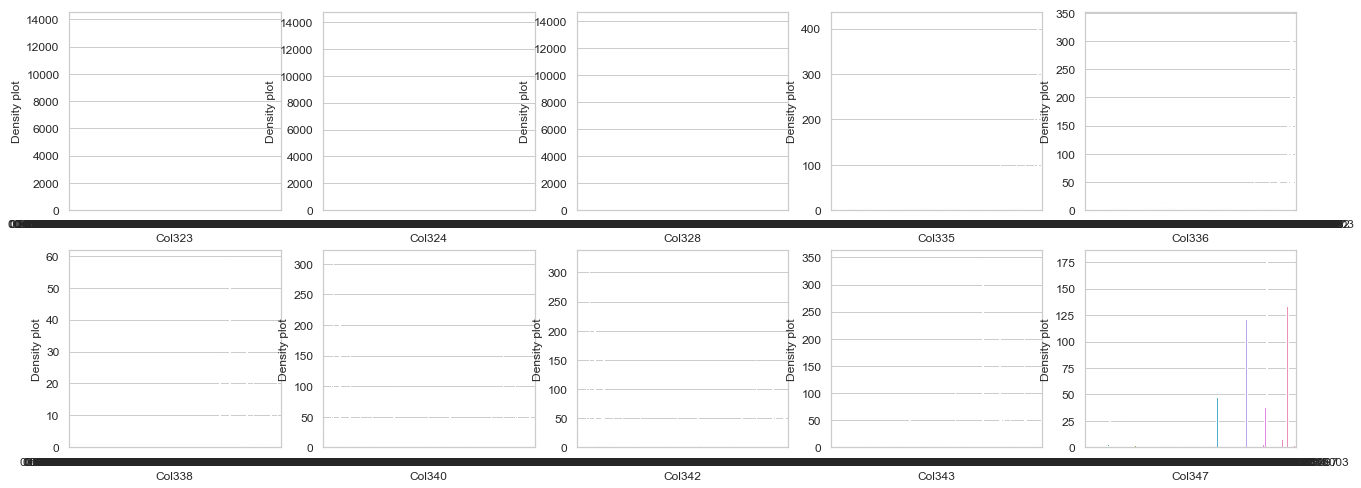

Printing from 160 to 170


<Figure size 432x288 with 0 Axes>

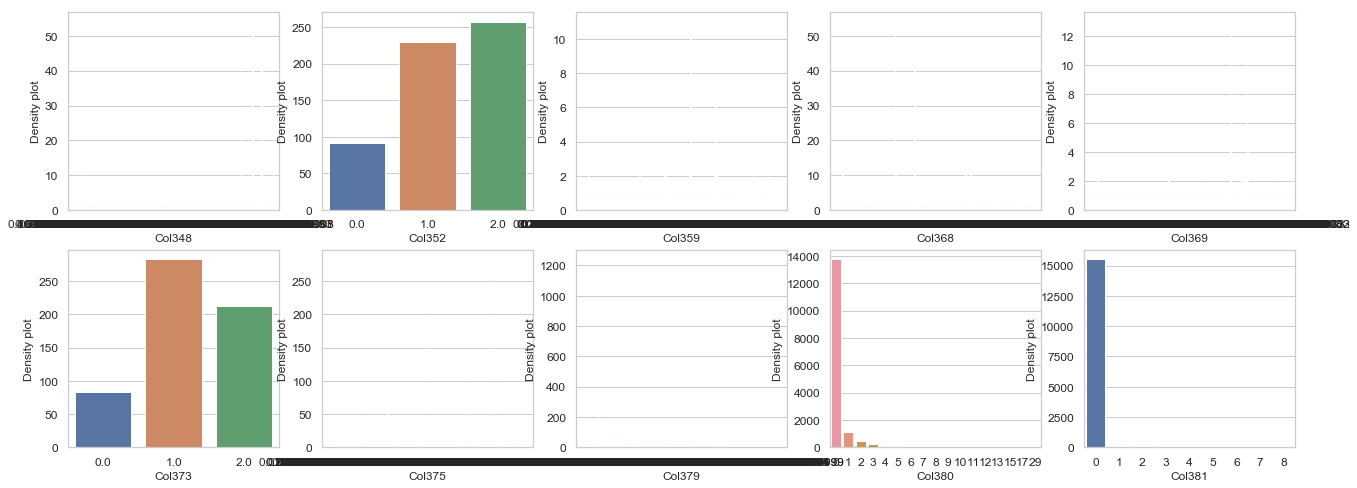

Printing from 170 to 180


<Figure size 432x288 with 0 Axes>

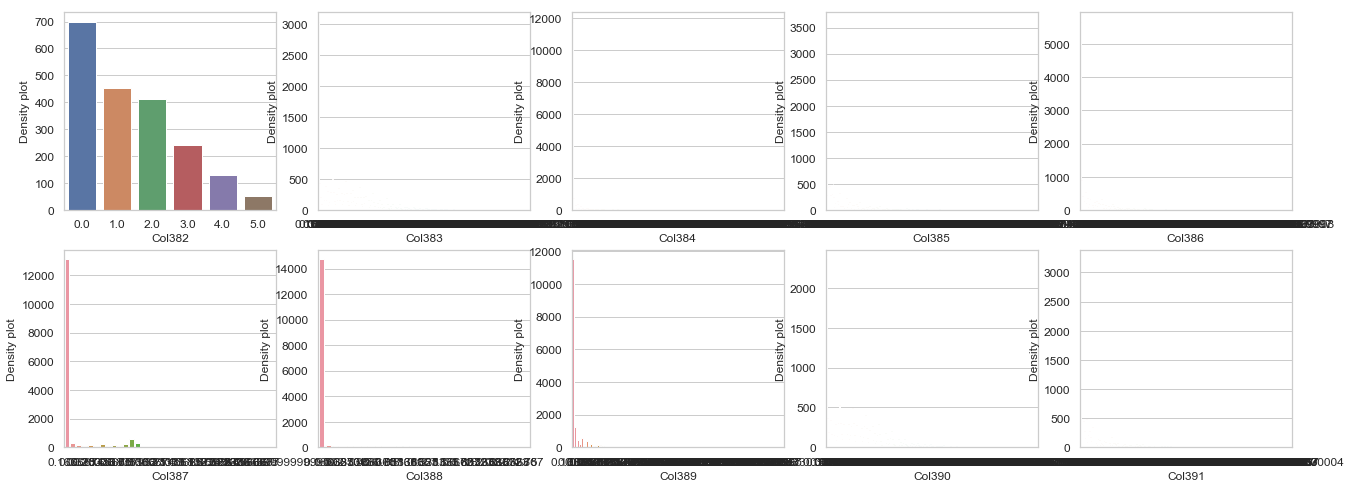

Printing from 180 to 190


<Figure size 432x288 with 0 Axes>

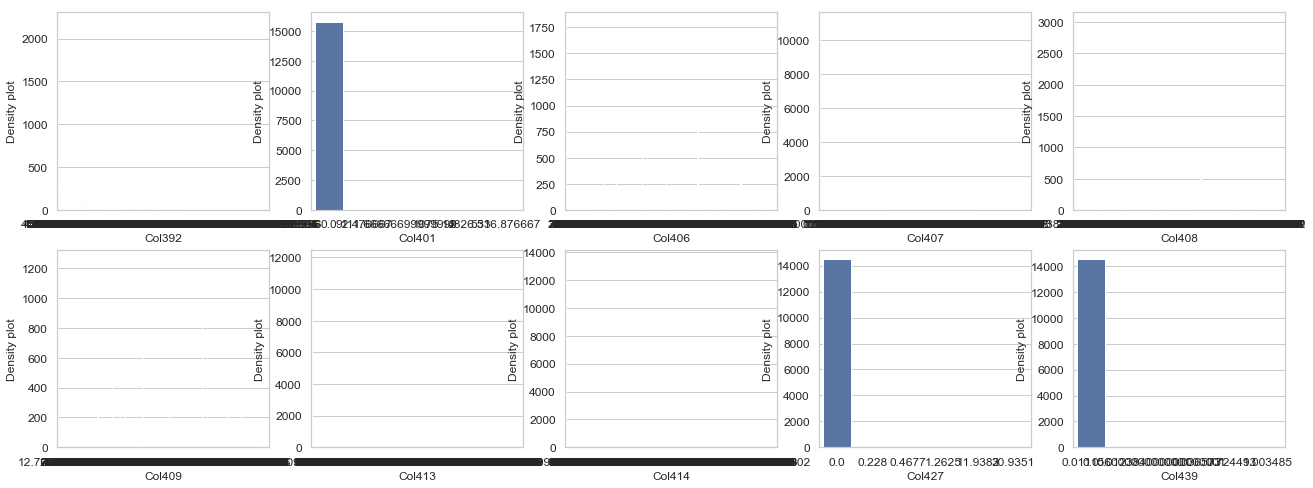

Printing from 190 to 200


<Figure size 432x288 with 0 Axes>

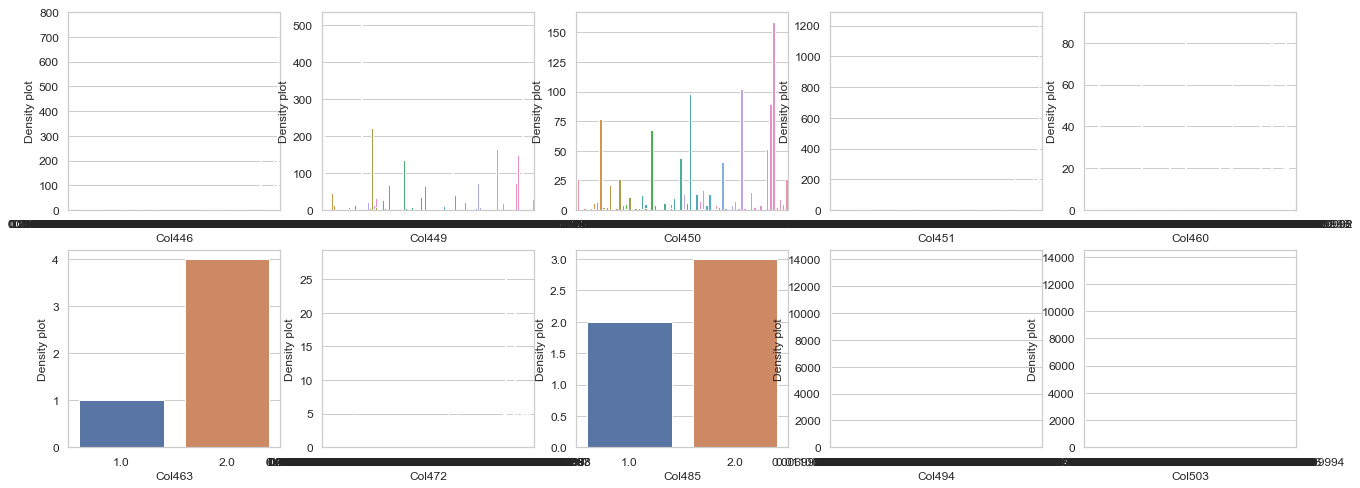

In [67]:
for i in range(10,20):
    print("Printing from {} to {}".format(i*10, (i+1)*10))
    plot_distribution(worst_cols[i*10:(i+1)*10])

Printing from 100 to 110


<Figure size 432x288 with 0 Axes>

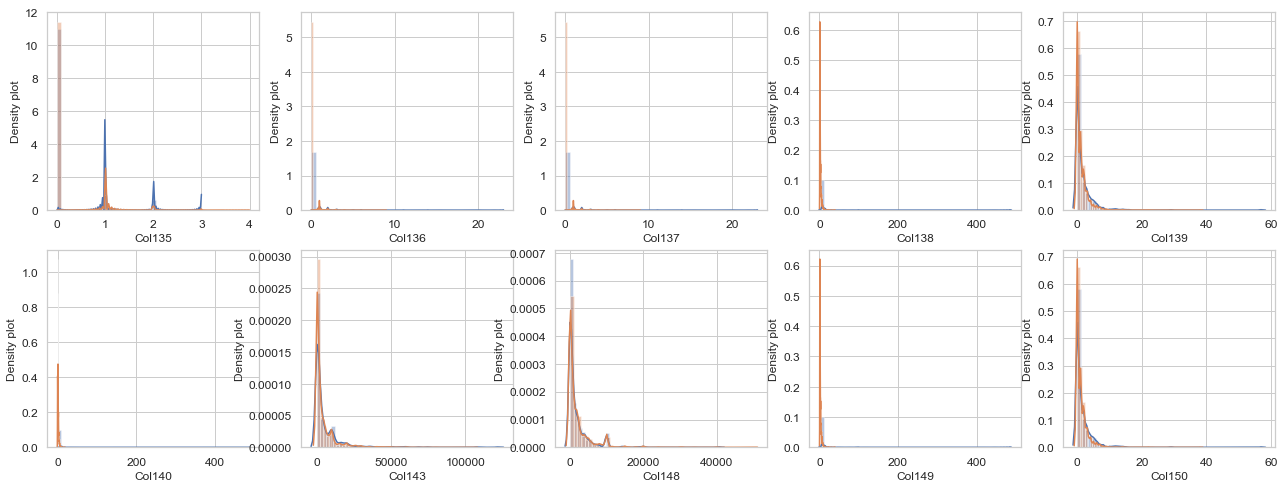

Printing from 110 to 120


<Figure size 432x288 with 0 Axes>

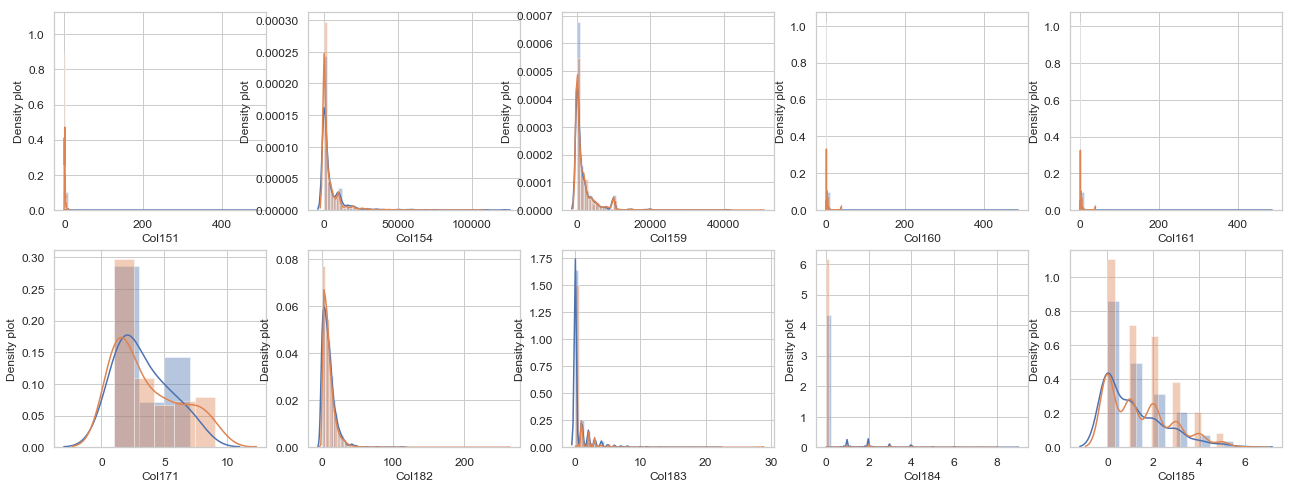

Printing from 120 to 130


<Figure size 432x288 with 0 Axes>

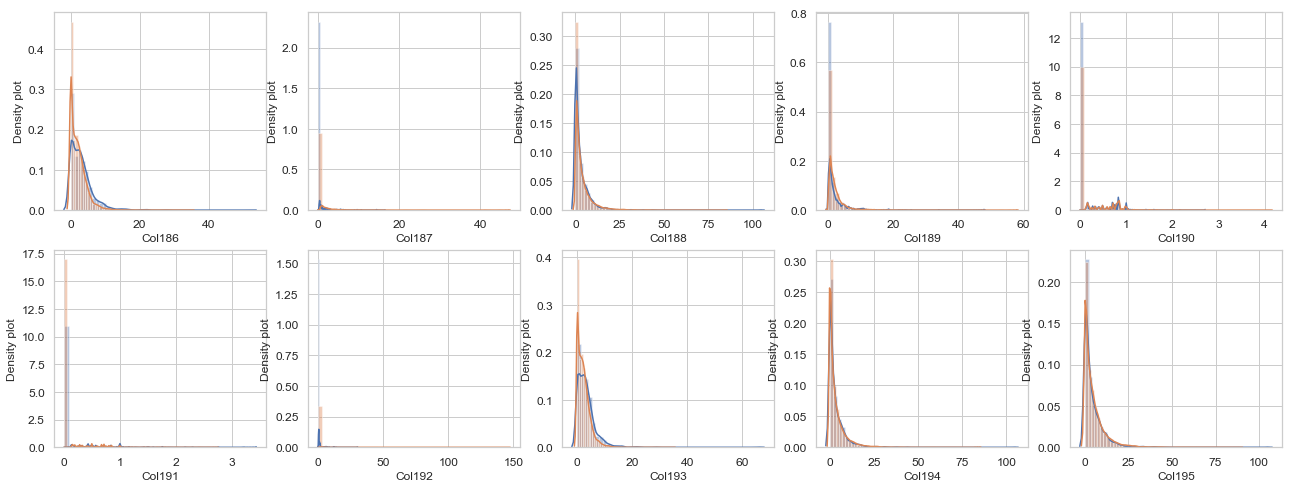

Printing from 130 to 140


<Figure size 432x288 with 0 Axes>

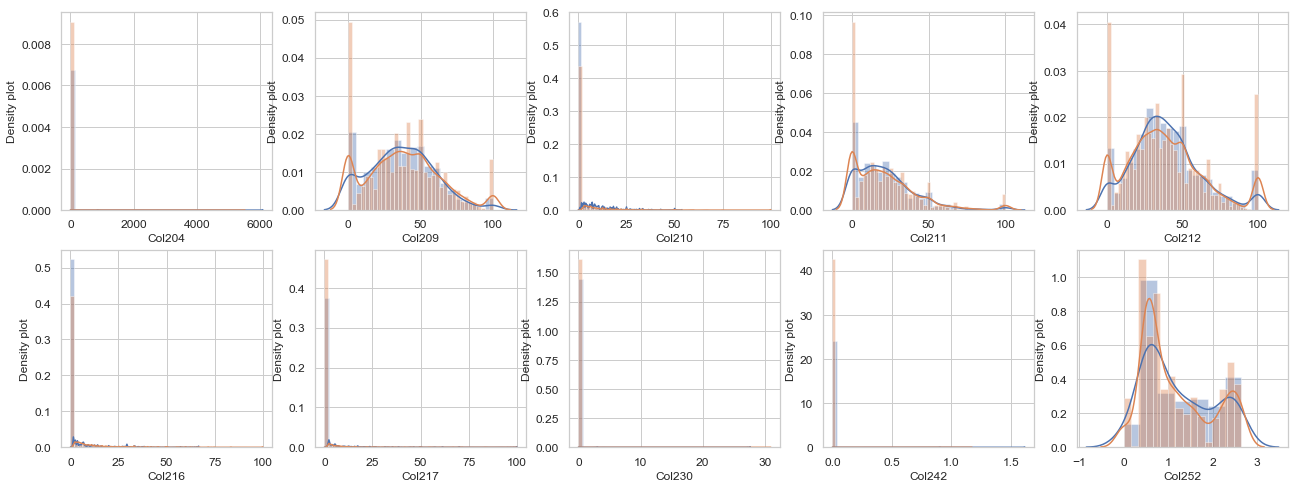

Printing from 140 to 150


<Figure size 432x288 with 0 Axes>

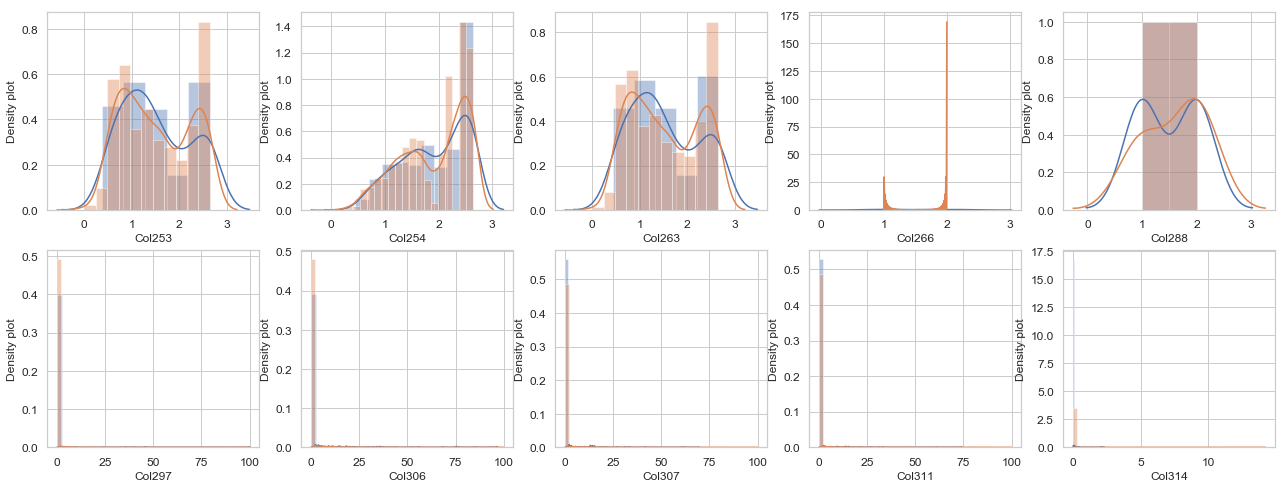

Printing from 150 to 160


<Figure size 432x288 with 0 Axes>

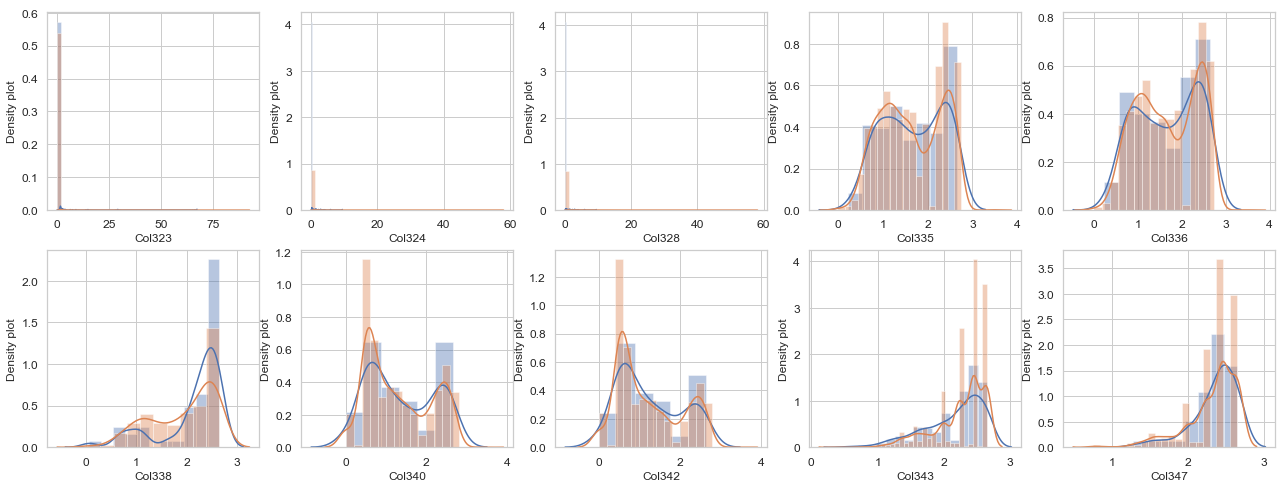

Printing from 160 to 170


<Figure size 432x288 with 0 Axes>

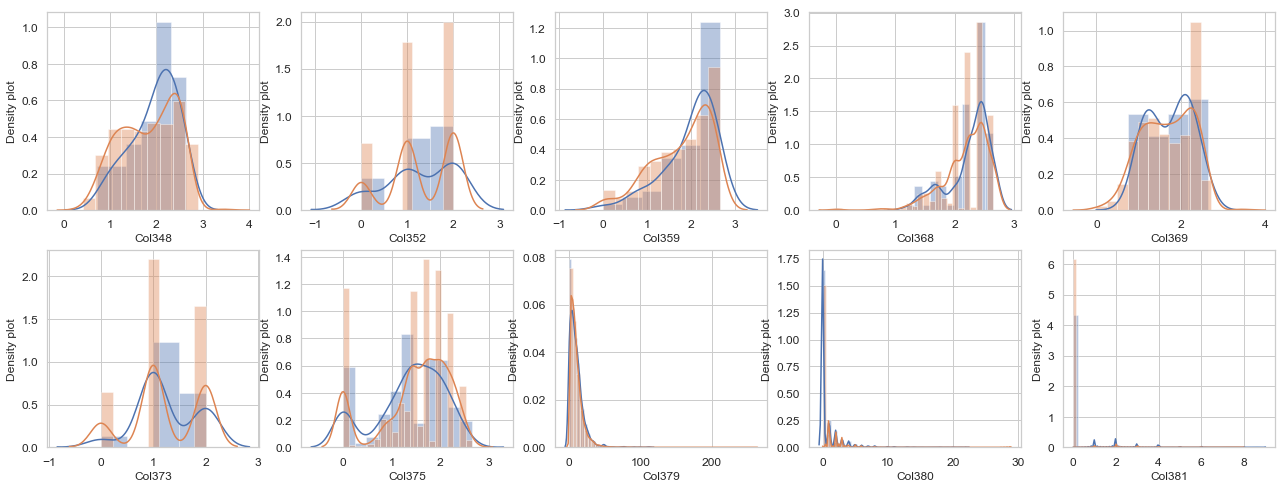

Printing from 170 to 180


<Figure size 432x288 with 0 Axes>

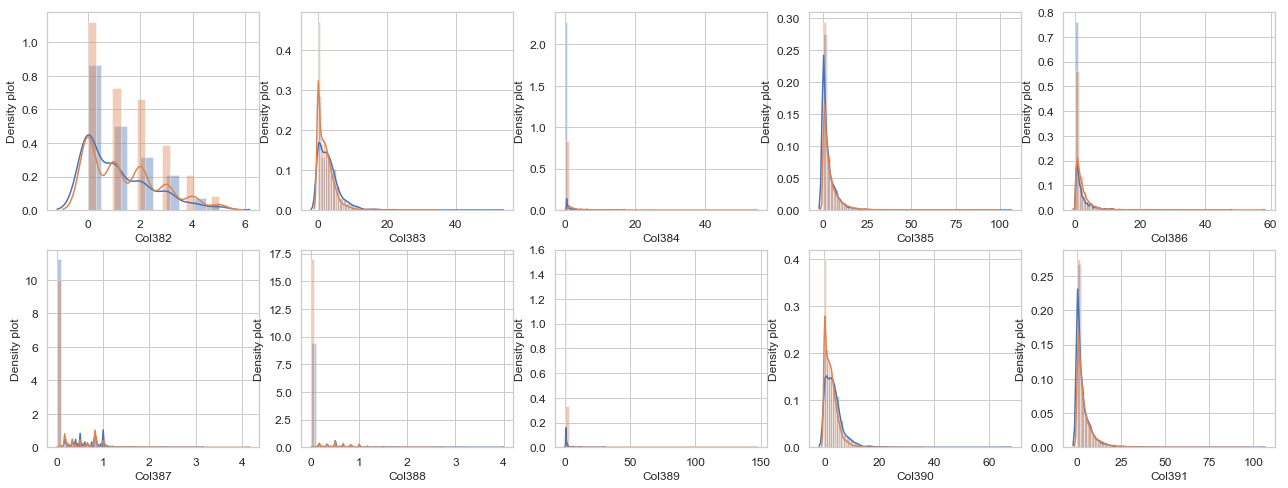

Printing from 180 to 190


<Figure size 432x288 with 0 Axes>

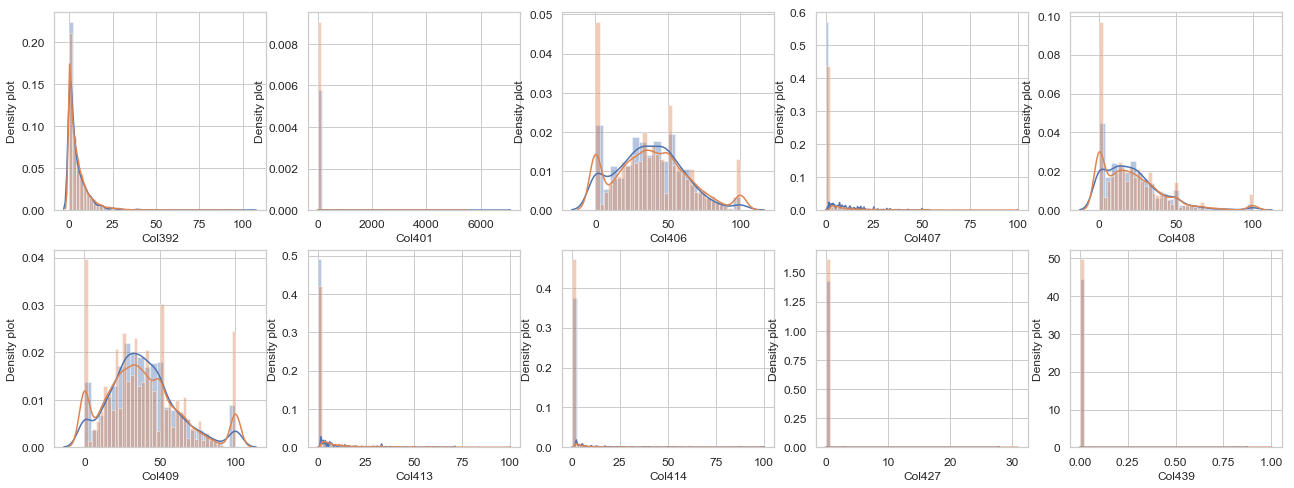

Printing from 190 to 200


<Figure size 432x288 with 0 Axes>

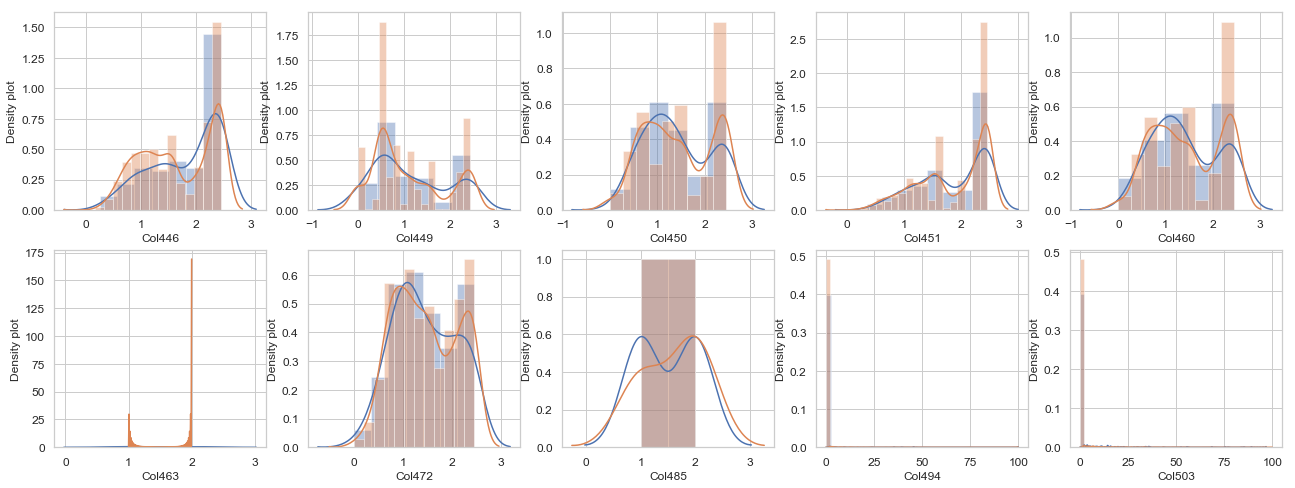

In [70]:
for i in range(10,20):
    print("Printing from {} to {}".format(i*10, (i+1)*10))
    plot_distribution(cat_cols[i*10:(i+1)*10])

## There is very high correlation among some feature
- Following is some of interesting columns, which some-time helps in decision making **with very high impotance** and other time, it has **null importance**.
- i tried to analyze them differently

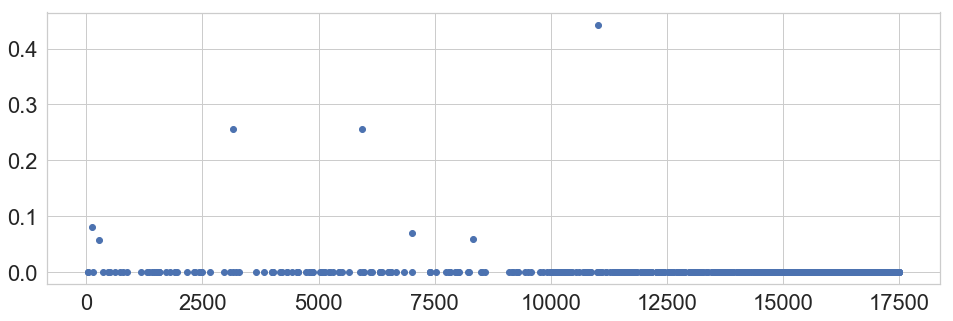

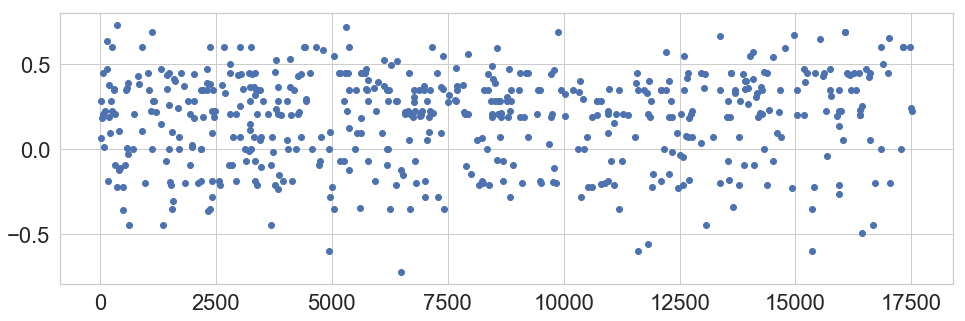

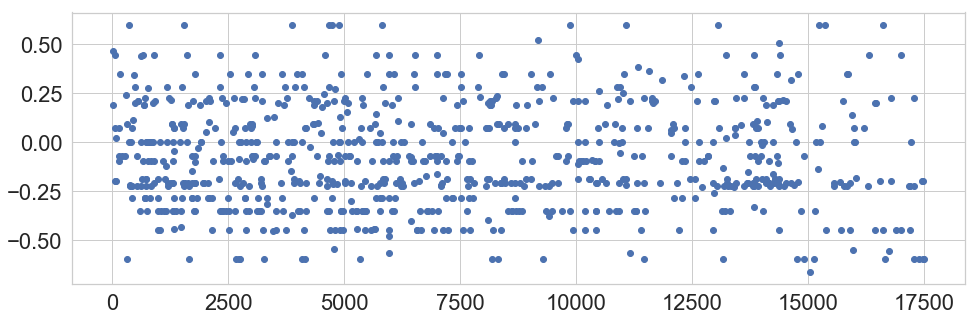

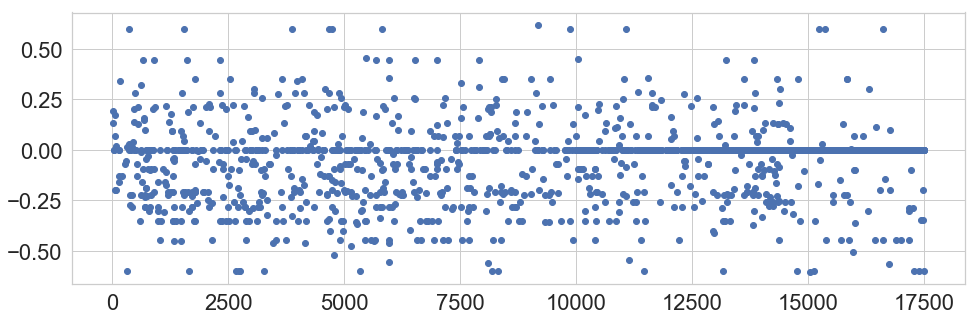

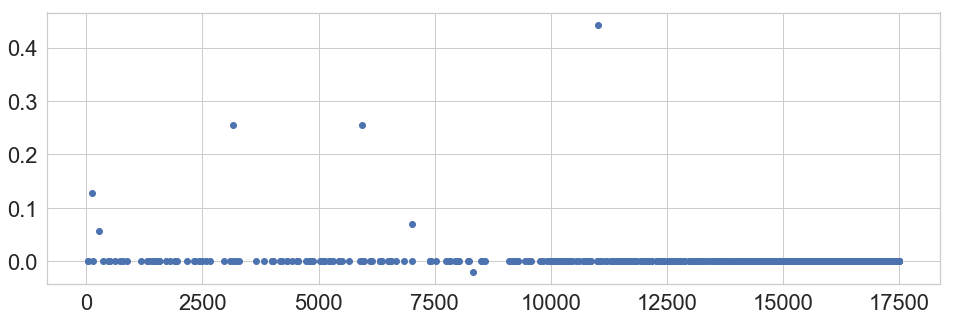

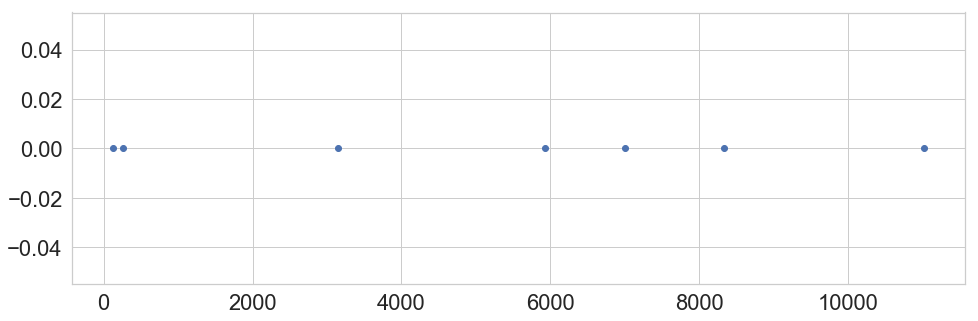

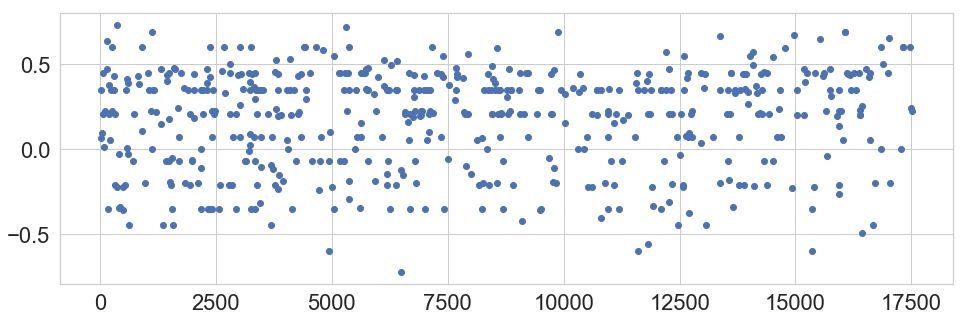

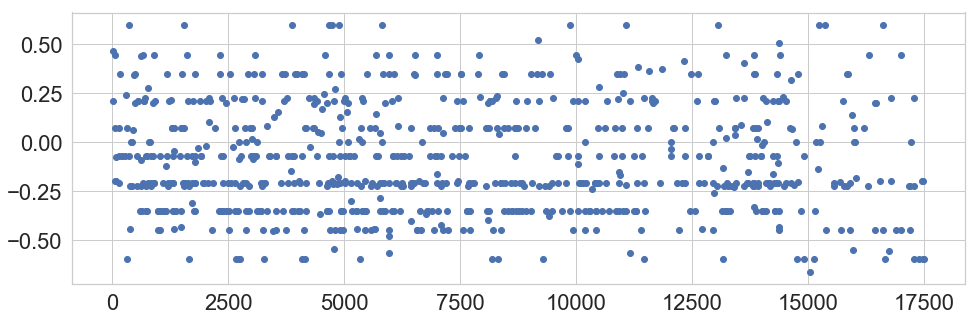

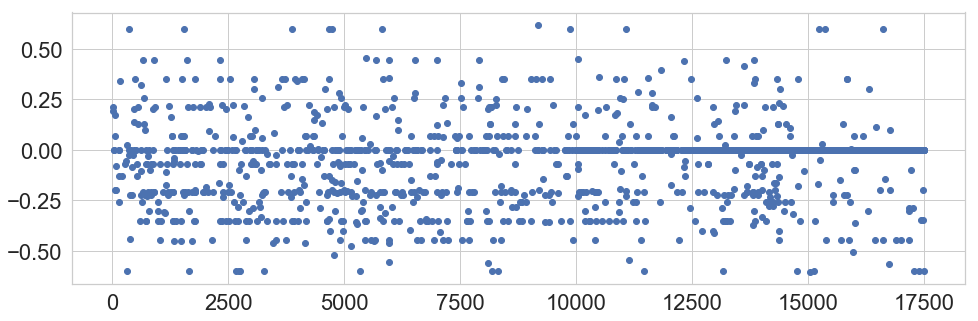